### This is CHatGPT generated Python code to do PETH analysis    
### Doing Rat1 Day1 in Exp 3
#### Just do stim times and USV times (NO stop time) in 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Stim times and USV times

event_times = np.loadtxt('stim.csv', delimiter=',', skiprows=1) # skip the col label row
spike_times = np.loadtxt('USV.csv', delimiter=',', skiprows=1) # skip col label row

In [3]:
event_times

array([  65.68,  133.19,  185.95,  245.94,  306.1 ,  349.64,  395.79,
        449.56,  510.94,  574.08,  618.71,  685.73,  747.19,  798.13,
        855.73,  898.61,  948.32, 1008.28, 1066.84, 1127.11])

In [4]:
spike_times

array([3.00000e-01, 7.80000e-01, 8.70000e-01, ..., 1.12092e+03,
       1.12132e+03, 1.12149e+03])

In [5]:
# Parameters
pre_event_time = 1  # Time before event to include (in seconds)
post_event_time = 2  # Time after event to include (in seconds)
bin_size = 0.1  # Bin size (in seconds)

In [6]:
# Initialize list to store all aligned spikes
aligned_spikes = []

In [7]:
# Align spikes to event times
for event in event_times:
    aligned_spikes.extend(spike_times - event)

# Filter spikes within the desired time window
aligned_spikes = np.array([spike for spike in aligned_spikes if -pre_event_time <= spike <= post_event_time])


In [7]:
# Compute histogram
bins = np.arange(-pre_event_time, post_event_time + bin_size, bin_size)
hist, edges = np.histogram(aligned_spikes, bins=bins)


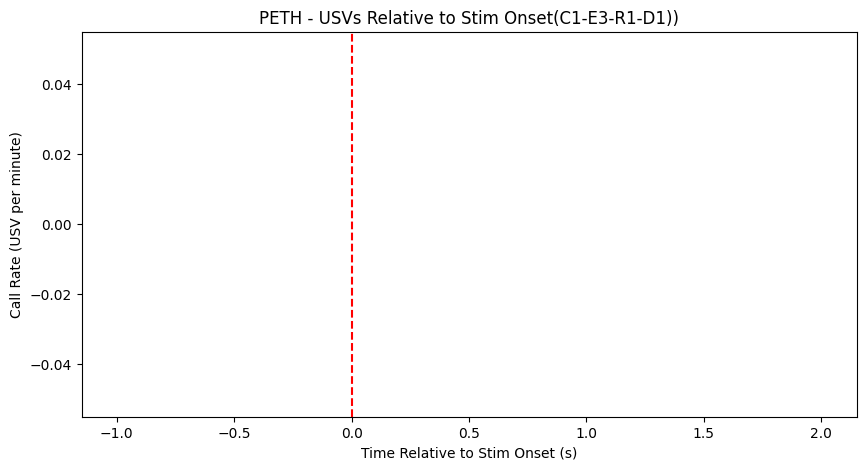

In [8]:
# Plot PETH
plt.figure(figsize=(10, 5))
plt.bar(edges[:-1], hist, width=bin_size, align='edge')
plt.xlabel('Time Relative to Stim Onset (s)')
plt.ylabel('Call Rate (USV per minute)')
plt.title('PETH - USVs Relative to Stim Onset(C1-E3-R1-D1))')
plt.axvline(0, color='red', linestyle='--')  # Mark the Stim time
plt.show()